# Restaurant Business Rankings 2020

<ol>
    <li> 
        <strong><a href="#1.">Importing Libraries and Loading Data</a></strong>
    </li>
    <li> 
        <strong><a href="#2.">Top 250 Restaurants</a></strong>
        <ul style="list-style: none;">
            <li>
                2.1 <a href="#2.1">Normalizing Data and Extracting Features</a>
                <ul style="list-style: none;">
                    <li>
                        2.1.1 <a href="#2.1.1">Standarizing Columns</a>
                    </li>
                </ul>
            </li>
            <li>
                2.2 <a href="#2.2">Exploratory Data Analysis</a>
                <ul style="list-style: none;">
                    <li>
                        2.2.1 <a href="#2.2.1">Analyzing Single Variables</a>
                        <ul style="list-style: none;">
                            <li>
                                2.2.1.1 <a href="#2.2.1.1">Category</a>
                            </li>
                            <li>
                                2.2.1.2 <a href="#2.2.1.2">Headquarters</a>
                            </li>
                            <li>
                                2.2.1.3 <a href="#2.2.1.3">Sales</a>
                                <ul style="list-style: none;">
                                    <li>
                                        2.2.1.3.1 <a href="#2.2.1.3.1">Year On Year Sales (%)</a>
                                    </li>
                                </ul>
                            </li>
                            <li>
                                2.2.1.4 <a href="#2.2.1.4">Units</a>
                                <ul style="list-style: none;">
                                    <li>
                                        2.2.1.4.1 <a href="#2.2.1.4.1">Year On Year Units (%)</a>
                                    </li>
                                </ul>
                            </li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ol>

<a id="1."></a>

# 1. Importing Libraries and Loading Data

In [1]:
# data handling and stats
import pandas as pd
import numpy as np
import scipy

# visualization
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

# machine learning
from sklearn.preprocessing import LabelEncoder

In [2]:
# Uncomment cells to download the datasets

#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Future50.csv -P datasets
#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Independence100.csv -P datasets
#!wget https://raw.githubusercontent.com/ftarantuviez/Restaurant-Business-Rankings-2020/master/datasets/Top250.csv -P datasets

### Load datasets

In [3]:
df_top = pd.read_csv("datasets/Top250.csv")
df_ind = pd.read_csv("datasets/Independence100.csv")
df_fut = pd.read_csv("datasets/Future50.csv")

In [4]:
print("The shape of Top250 dataset is {}".format(df_top.shape))
print("The shape of Independence100 dataset is {}".format(df_ind.shape))
print("The shape of Future50 dataset is {}".format(df_fut.shape))

The shape of Top250 dataset is (250, 9)
The shape of Independence100 dataset is (100, 7)
The shape of Future50 dataset is (50, 9)


The number of observations are the expected, 250 for the 250 top restaurants, a hundred for the 100 best independece restaurants and just fifty for the future 50. However we see that the independence dataset has two column less than the other two datasets.

<a id="2."></a>

# 2. Top 250 restaurants

First we will start analyzing the dataset of the 250 top restaurants in the world. And to understand the data, below is a description of all the features in the dataset

- Rank: Ranking position
- Restaurant: Restaurant name
- Content: Description, only for certain restaurants
- Sales: in 2019 ($000000)
- YOY_sales: Year on year sales increase in %
- Units: Number of premises in US
- YOY_units: Year on year units increase in %
- Headquarters: Place of the restaurant's headquarters
- Segment_Category: Menu type and / or industry segment

In [5]:
df_top.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


<a id="2.1"></a>

## 2.1 Normalizing Data and Extracting Features

To facilitate the process of data analysis and data processing is a good approach follow some standards. Also, extracting some new features from the base one can be very useful for exploratory data analysis.

<a id="2.1.1"></a>

### 2.1.1 Standarizing Columns

First we are gonna make all the columns names as lowercase

In [6]:
columns_names = {
    "Rank": "rank",
    "Restaurant": "restaurant",
    "Content": "description",
    "Sales": "sales",
    "YOY_Sales": "YOY_sales",
    "Units": "units",
    "YOY_Units": "YOY_units",
    "Headquarters": "headquarters",
    "Segment_Category": "category"
}


df_top.rename(columns_names, axis=1, inplace=True)
df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


Then we can see that the variables which represent a percentage are in other type than number. This is because they have the sign of percentage %, so are converted to a string. Which I gonna do is create a new features with the same value but without that sign, and in a numerical format.

In [7]:
df_top[["YOY_sales", "YOY_units"]].dtypes

YOY_sales    object
YOY_units    object
dtype: object

In [8]:
df_top["YOY_sales_%"] = df_top["YOY_sales"].apply(lambda x: float(x.split("%")[0]))
df_top["YOY_units_%"] = df_top["YOY_units"].apply(lambda x: float(x.split("%")[0]))

df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category,YOY_sales_%,YOY_units_%
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,4.9,-0.5
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,8.6,3.0
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,13.0,5.0
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,9.0,2.7
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,2.7,0.2


Now let's analyse the feature of "category"

In [9]:
df_top.category.value_counts()[:5], len(df_top.category.value_counts())

(Varied Menu               22
 Mexican                   14
 Quick Service & Burger    13
 Burger                    10
 Family Style              10
 Name: category, dtype: int64,
 48)

As we can see, there are a lot of different categories. Also we can notice that some possible values contains two categories differents (for example: "Quick Service & Seafood"). What we are gonna do is split this categories into two different one and then get the dummies of all the categories, turning the categorical variable into a lot of numerical features.

In [10]:
all_categories = []
def get_all_categories(df):
    for i, category in enumerate(df.category):
        categories = category.split("&")
        for category in categories:
            category = category.lower()
            category = category.strip()
            category = "_".join(category.split())

            if category in df.columns.values:
                df.at[i, category] = 1
            else: 
                df[category] = 0 
                df.at[i, category] = 1

In [11]:
get_all_categories(df_top)
df_top.head()

,rank,restaurant,description,sales,YOY_sales,units,YOY_units,headquarters,category,YOY_sales_%,...,steak,seafood,family_casual,asian,snack,beverage,fine_dining,bbq,healthy,ethnic
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger,4.9,...,0,0,0,0,0,0,0,0,0,0
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe,8.6,...,0,0,0,0,0,0,0,0,0,0
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken,13.0,...,0,0,0,0,0,0,0,0,0,0
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican,9.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger,2.7,...,0,0,0,0,0,0,0,0,0,0


There we see the dummies features for all the different categories and their combinations.
To check it and prove it that we are in the correct side, let's run a simple test

In [12]:
def check_categories(serie, cat_to_check):
    ans = 0
    for categories in serie:
        if cat_to_check in categories:
            ans += 1
    return ans

print("There are {} restaurants with Mexican food".format(check_categories(df_top.category, "Mexican")))
print("And in the dummies are also {} restaurants".format(df_top.mexican.sum()))

There are 19 restaurants with Mexican food
And in the dummies are also 19 restaurants


As we see, the logic appears to be in the correct place.

Now we will add a single feature with the code of each different categories. Notice that here we are not considering the single category for each restaurant, instead the combination (if any). To achieve it, we use LabelEncoder from scikit learn

In [13]:
df_top["category_code"] = LabelEncoder().fit_transform(df_top.category)
df_top.category_code.unique()

array([32, 34, 33, 37, 39, 38, 18, 21,  6, 10, 17, 36,  8, 15,  9,  7, 23,
       20, 35, 19,  5, 41, 46, 31, 45, 40, 30, 22, 24, 28, 47, 11, 27, 29,
       43, 25, 12,  2, 42,  3,  4,  0, 16,  1, 14, 44, 26, 13])

Finally, we gonna extract the state of the headquarters in each restaurants.

Points to consider: 
- most restaurants don't have headquarters in the dataset (are NaN values)
- the headquarters place are in the format of: City, State (e.g. Dallas, TX)

In [14]:
def get_states(x):
    if type(x) == str:
        x = x.split(",")[1]
        x = x.strip()
    
    return x

df_top["headquarters_state"] = df_top.headquarters.apply(get_states)
df_top[~df_top["headquarters_state"].isna()]["headquarters_state"].head()

65     ON
66     FL
77     TX
101    TX
102    TN
Name: headquarters_state, dtype: object

<a id="2.2"></a>

<a id="250rest_eda"></a>

## 2.2 Exploratory Data Analysis

With the data already normalized, starting exploring the same data is a good idea. This section will be based in data analysis and statistics techniques.

<a id="2.2.1"></a>

### 2.2.1 Analyzing Single Variables

First things first. To have a good idea of our data, first we analize the single variables that we already have.

We create some function that allow us to plot and summarize categorical data

In [39]:
def plot_proportions(x, y, title="", theme=None, what_to_show=[]):
    colors = sns.color_palette(theme)
    
    if what_to_show[0] and what_to_show[1]:
        grid_size = 2
    elif what_to_show[0] or what_to_show[1]:
        grid_size = 1
    else:
        grid_size = False
    
    if grid_size:
        fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
        fig1.suptitle(title)

        if what_to_show[0]:
            # barchart
            ax1.bar(height=y, x=x, color=colors)
            ax1.plot(y, color="red", label="Difference of recurrence")
            ax1.set_xticks([])
            ax1.legend()

        if what_to_show[1]:
            # pie chart
            explode = [.05] + [0]*(len(y)-1)
            wedges, texts, autotexts = ax2.pie(x=y, autopct='%1.2f%%', textprops=dict(color="w"), explode=explode, colors=colors)
            ax2.legend(wedges, x,
              title="Category",
              loc="center left",
              bbox_to_anchor=(-.5, 0, 0.5, 1.3))
    
    if what_to_show[2]:
        # waffle chart
        fig2 = plt.figure(
            FigureClass=Waffle,
            rows=5, 
            columns=10,
            values=y,
            figsize=(10, 6),
            labels=list(x),
            legend={'loc': 'upper right', "bbox_to_anchor":(1, 0, 0.5, 1), "title": "Enrrollment type"},
            colors=sns.color_palette("flare_r", len(x))
        )

def create_subset_dataset(counts, col, n, name):
    subset = pd.DataFrame(counts[:n]).reset_index()
    subset_count = subset.iloc[:,1].rename("count")
    subset_val = subset.iloc[:,0].rename(col)
    subset = pd.DataFrame([subset_count, subset_val]).T
    subset["type"] = name
    
    return subset
    
def summary_categorical(df, 
                        col, 
                        n_to_plot=None, 
                        custom_title=None, 
                        show_text=True, 
                        n_text=5,
                        color=None,
                        charts=[True, True, False]
                       ):
    fifth_per = 0
    n_text = n_text if n_text <= 5 else 5
    def print_information(place, i, percentage):
        print(""" 
            the {} recurrent {} 
            is **{}** with a count of {} times.
            In the entire dataset, it represents a percentage of {} %
            """.format(place, var, x[i], y[i], percentage))
        
    counts = df[col].value_counts()
    x = counts.index.values
    y = counts
    var = " ".join(col.split("_"))
    title = "Most Recurrent {}".format(var)
    
    if n_to_plot != None:
        top = create_subset_dataset(counts, col, n_to_plot, "top")
        x = top[col]
        y = top["count"]
        title = "Top {} {}s (most recurrent)".format(n_to_plot, var)
    
    title = custom_title if custom_title else title
    plot_proportions(x,y,title, theme=color, what_to_show=charts)
    
    if show_text:
        for i, label in zip(range(n_text), ["first", "second", "third", "fourth", "fifth"]):
            percentage = np.round((counts / len(df[col]))[i] * 100,2)
            print_information(label, i, percentage)
            fifth_per += percentage
    
    if n_text > 0:
        print("The first most common {}, represents a {}% of the whole dataset".format(n_text, np.round(fifth_per,2)))
    print("")

Also functions to understand continous data:

In [16]:
def summary_continous(df, var, show_lines=True):
    serie = df[var]
    mean = np.round(serie.mean(), 2)
    median = np.round(serie.median(), 2)
    std = np.round(serie.std(), 2)
    var_formatted = " ".join(var.split("_"))
    
    fig, axes = plt.subplots(2,2, figsize=(15,8))
    plt.suptitle("{} -- distribution".format(var_formatted))
    fig.set_facecolor(color="#f2f2f2")
    
    # kdeplot
    kde_ax = axes[1][0]
    sns.kdeplot(df[var], fill=True, ax=kde_ax)
    if show_lines:
        kde_yticks = kde_ax.get_yticks()
        kde_yticks_half = kde_yticks[(len(kde_yticks) // 2)]
        kde_ax.vlines(x=mean, ymin=0, ymax=max(kde_yticks), color="red", label=r"$\mu$ = {}".format(mean))
        kde_ax.vlines(x=median, ymin=0, ymax=max(kde_yticks), color="blue", label=r"median = {}".format(median))
        kde_ax.hlines(y=kde_yticks_half, xmin=mean, xmax=mean+std, color="green")
        kde_ax.hlines(y=kde_yticks_half, xmin=mean, xmax=mean-std, color="green", label="σ = {}".format(std))
        kde_ax.legend()
    
    # violinplot
    vio_plot = axes[1][1]
    sns.violinplot(x=df[var], ax=vio_plot)
    
    # histplot
    hist_ax = axes[0][0]
    hist_ax.hist(df[var])
    hist_yticks = hist_ax.get_yticks()
    if show_lines:
        hist_ax.vlines(x=mean, ymin=0, ymax=max(hist_yticks), color="red", label=r"$\mu$ = {}".format(mean))
        hist_ax.legend()
    
    # boxplot
    box_ax = axes[0][1]
    sns.boxplot(x=df[var],ax=box_ax)
    
    print("""The variable **{}** :: 
            has a range of [{}, {}], 
            where the mean fall in {} 
            with a standard deviation of {}, 
            and the median is equal to {}""".format(var_formatted, min(serie), max(serie), mean, std, median))

Now let's analyse each variable in the dataset.

<a id="2.2.1.1"></a>

#### 2.2.1.1 Category

In [17]:
category_250 = df_top.category
category_250.head()

0         Quick Service & Burger
1    Quick Service & Coffee Cafe
2        Quick Service & Chicken
3        Quick Service & Mexican
4         Quick Service & Burger
Name: category, dtype: object

Watching the most common categories ...

In [18]:
category_250.value_counts().head(8)

Varied Menu                    22
Mexican                        14
Quick Service & Burger         13
Burger                         10
Family Style                   10
Italian/Pizza                  10
Steak                           9
Casual Dining & Varied Menu     9
Name: category, dtype: int64

 
            the first recurrent category 
            is **Varied Menu** with a count of 22 times.
            In the entire dataset, it represents a percentage of 8.8 %
            
 
            the second recurrent category 
            is **Mexican** with a count of 14 times.
            In the entire dataset, it represents a percentage of 5.6 %
            
 
            the third recurrent category 
            is **Quick Service & Burger** with a count of 13 times.
            In the entire dataset, it represents a percentage of 5.2 %
            
 
            the fourth recurrent category 
            is **Burger** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
 
            the fifth recurrent category 
            is **Family Style** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
The first most common 5, represents a 27.6% of the whole dataset



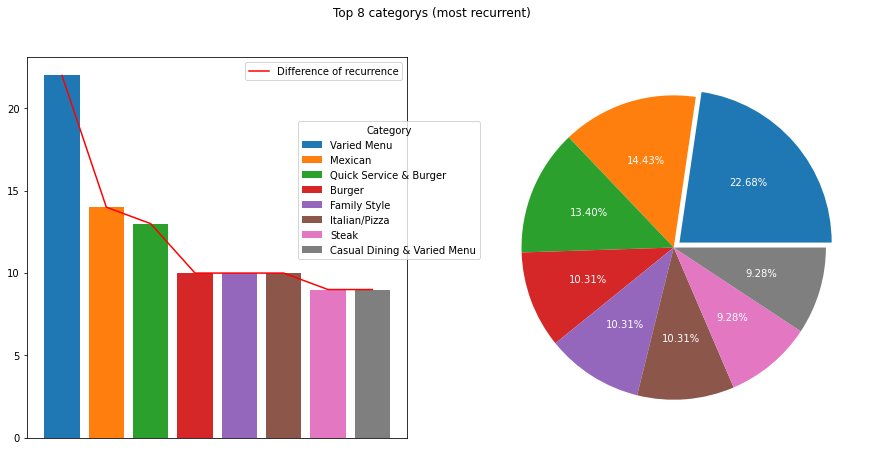

In [19]:
summary_categorical(df_top, "category", n_to_plot=8)

With the above information we can notice that the most common category in the top 250 restaurants is a Varied Menu, which means that does not have a specific thematic in the restaurant. It represent the 8.8% of the whole dataset (250 restaurants). Then also we can observe that Mexican food represents a 5.6% of the dataset. More generally, the fifth most common categories in the top 250 restaurants represents a 27.6% of the all restaurants.

<a id="2.2.1.2"> </a>

#### 2.2.1.2 Headquarters

In [20]:
headquarters_top = df_top.headquarters
headquarters_top.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: headquarters, dtype: object

[TO CONSIDER]: This variable has a lot of NaN values :p

In [21]:
headquarters_top.value_counts(dropna=False).head(8)

NaN            198
Dallas, TX       6
Irving, TX       3
Houston, TX      3
Austin, TX       2
Plano, TX        2
Addison, TX      2
Denver, CO       2
Name: headquarters, dtype: int64

 
            the first recurrent headquarters 
            is **Dallas, TX** with a count of 6 times.
            In the entire dataset, it represents a percentage of 2.4 %
            
 
            the second recurrent headquarters 
            is **Houston, TX** with a count of 3 times.
            In the entire dataset, it represents a percentage of 1.2 %
            
 
            the third recurrent headquarters 
            is **Irving, TX** with a count of 3 times.
            In the entire dataset, it represents a percentage of 1.2 %
            
 
            the fourth recurrent headquarters 
            is **Addison, TX** with a count of 2 times.
            In the entire dataset, it represents a percentage of 0.8 %
            
 
            the fifth recurrent headquarters 
            is **Denver, CO** with a count of 2 times.
            In the entire dataset, it represents a percentage of 0.8 %
            
The first most common 5, represents a 6.4% of the whole datas

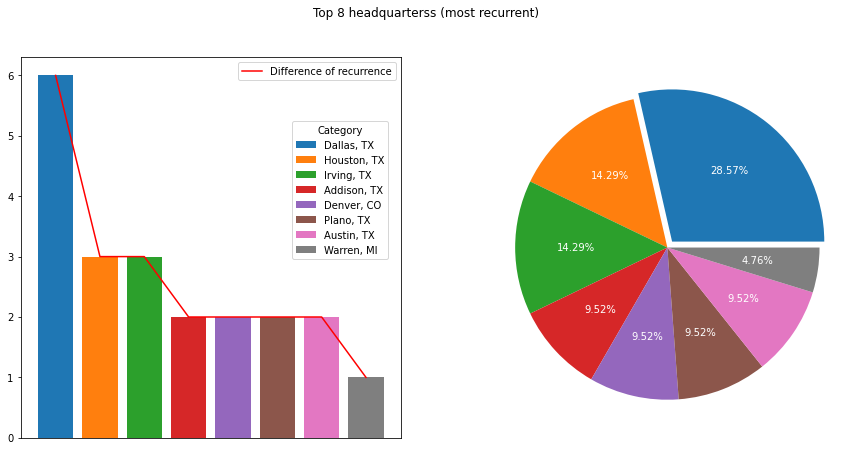

In [22]:
summary_categorical(df_top, "headquarters", n_to_plot=8)

As we can notice, most of the headquarters are in Dallas, Texas. However, this "most" are only 6 restaurants, and also represents just a 2.4% of the dataset. Why? Because, as previously said, there are a lot of NaN values.
Maybe a best approach is just analyze the state instead de city-state combination

<a id="2.2.1.3"></a>

#### 2.2.1.3 Sales

The variable **sales** :: 
            has a range of [126, 40412], 
            where the mean fall in 1242.74 
            with a standard deviation of 3365.23, 
            and the median is equal to 330.0


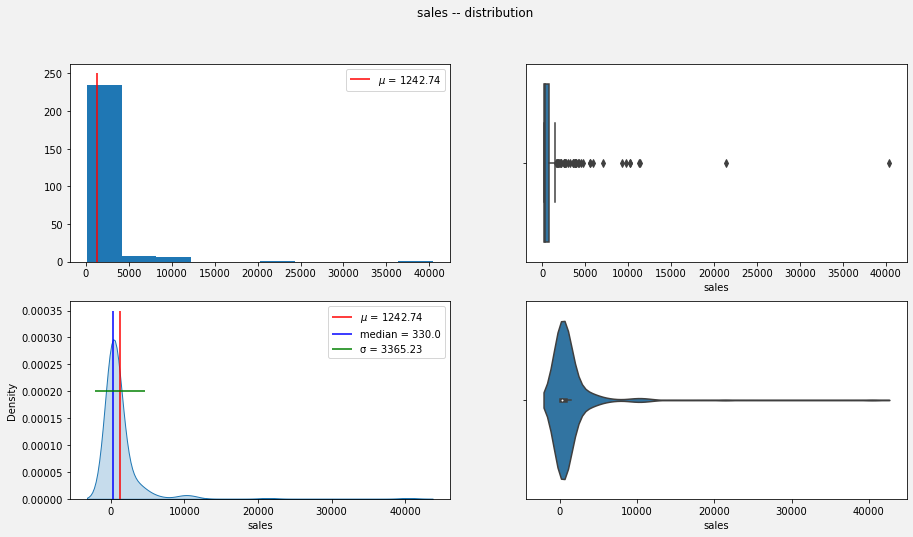

In [23]:
summary_continous(df_top, "sales")

[TO REMEMBER] The values are in millions dollars

The above charts tell us that the sales have a large range of values, starting almost from 0 (126 exactly) and going to ~40,000. It appears to be a normal distribution (bell shape) around 120 to 900, but with a huge right skew, meaning there are some restaurants that have had a lot of sales more than the majority of the others 250 restaurants. It is better seen in the boxplot, where we notice a big quanity of outliers.

Now we are gonna do a bin technique with the sales, to represent them as categorical variable and understand better it distribution. We are gonna make

 
            the first recurrent sales binned 
            is **(120, 500]** with a count of 160 times.
            In the entire dataset, it represents a percentage of 64.0 %
            
The first most common 1, represents a 64.0% of the whole dataset



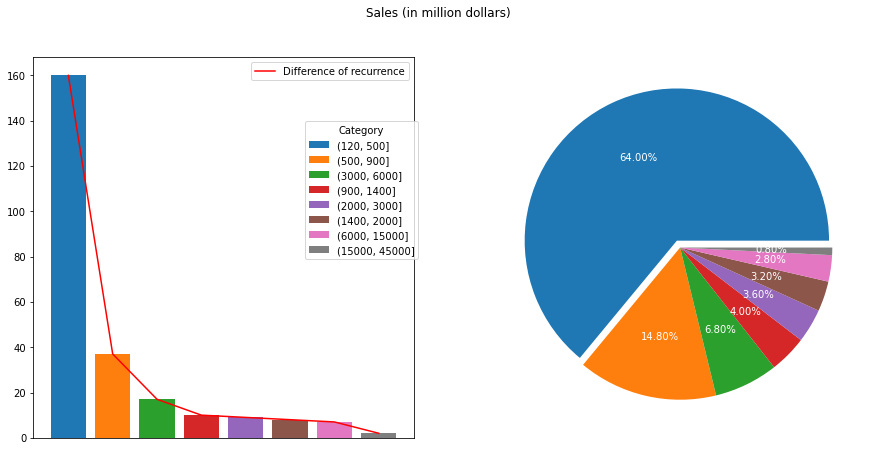

In [24]:
bins_sales = [120, 500, 900, 1400, 2000, 3000, 6000, 15000, 45000]
df_top["sales_binned"] = pd.cut(df_top.sales, bins=bins_sales).astype(str)
summary_categorical(df_top, "sales_binned", custom_title="Sales (in million dollars)", n_text=1)

There we can see that the most restaurants into the range of 120 to 500 (millions dollars), and a relativily big portion between 500 and 900 million dollars. And a really small proportion goes up to 10000.

In [25]:
logical_df_top_sales = df_top[df_top.sales > 10000]
for i, (rest, sales) in enumerate(zip(logical_df_top_sales.restaurant, logical_df_top_sales.sales)):
    print("The number {} restaurant in sales > 10000 is {} with {}000000$ sales in 2020".format(i, rest, sales))

The number 0 restaurant in sales > 10000 is McDonald's with 40412000000$ sales in 2020
The number 1 restaurant in sales > 10000 is Starbucks with 21380000000$ sales in 2020
The number 2 restaurant in sales > 10000 is Chick-fil-A with 11320000000$ sales in 2020
The number 3 restaurant in sales > 10000 is Taco Bell with 11293000000$ sales in 2020
The number 4 restaurant in sales > 10000 is Burger King with 10204000000$ sales in 2020
The number 5 restaurant in sales > 10000 is Subway with 10200000000$ sales in 2020


<a id="2.2.1.3.1"></a>

##### 2.2.1.3.1 Year On Year Sales (%)

The variable **YOY sales %** :: 
            has a range of [-21.2, 39.5], 
            where the mean fall in 2.94 
            with a standard deviation of 8.95, 
            and the median is equal to 2.2


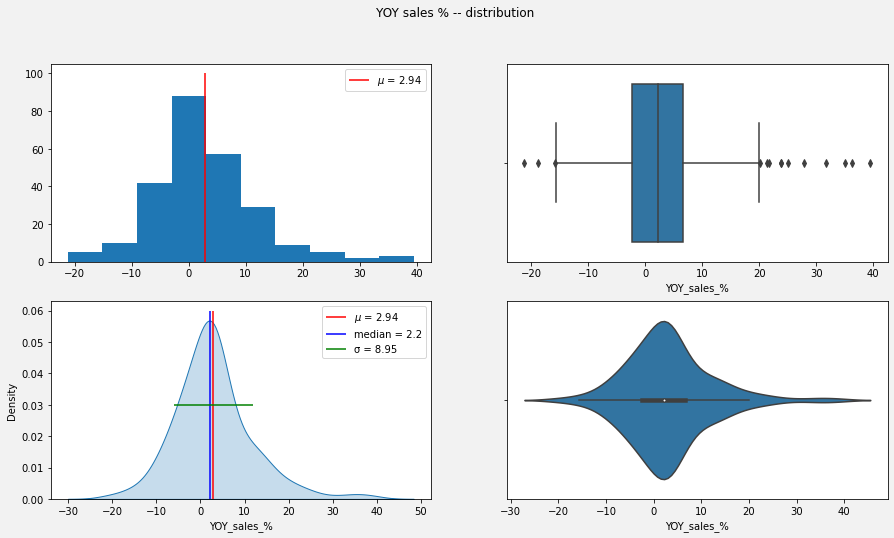

In [26]:
summary_continous(df_top, "YOY_sales_%")

In the Year on Year sales percentage, we can realize we have a bell shape depicting a normal distribution. However, there is a small right skew that can slightly affect the mean value. Most percentages of year on year sales fall between in the approximate range of (-9, 11), meaning that there are a significant number of restaurants with negative growth in matter of sales. Also there is another significant proportion which has not grown nothing (restaurants that are near to 0), some others has grown 5-10%, and a small percentage of the 250 restaurants has grown a lot (~40%)

For example, the restaurant which had the most agressive growth is shown below and his "Chicken Salad Chick"

In [27]:
max_growing = max(df_top["YOY_sales_%"])
df_top[df_top["YOY_sales_%"] == max_growing].reset_index(drop=True).loc[0, "restaurant"], max_growing

('Chicken Salad Chick', 39.5)

And the restaurant with the biggest decrease is "Houlihan's"

In [28]:
min_growing = min(df_top["YOY_sales_%"])
df_top[df_top["YOY_sales_%"] == min_growing].reset_index(drop=True).loc[0, "restaurant"], min_growing

("Houlihan's", -21.2)

 
            the first recurrent YOY sales binned 
            is **(0.0, 21.2]** with a count of 154 times.
            In the entire dataset, it represents a percentage of 61.6 %
            
 
            the second recurrent YOY sales binned 
            is **(-21.2, 0.0]** with a count of 85 times.
            In the entire dataset, it represents a percentage of 34.0 %
            
 
            the third recurrent YOY sales binned 
            is **(21.2, 39.5]** with a count of 10 times.
            In the entire dataset, it represents a percentage of 4.0 %
            
The first most common 3, represents a 99.6% of the whole dataset



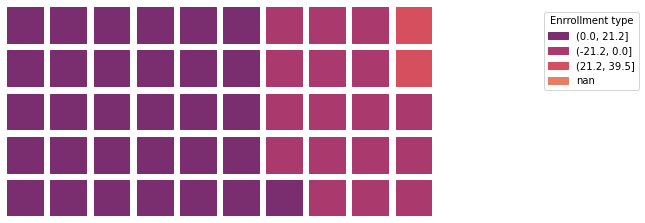

In [29]:
df_top["YOY_sales_binned"] = pd.cut(df_top["YOY_sales_%"], bins=[min_growing, 0, (min_growing * -1), max_growing]).astype(str)
summary_categorical(df_top, 
                    "YOY_sales_binned", 
                    n_text=3,
                    charts=[False, False, True]
                   )

154 restaurants had grown in 2020 around (0, 21]%, others 85 restaurants have decrease their sales between (0, 21]%, and only ten restaurants eateries have grown more than 21% 

<a id="2.2.1.4"></a>

#### 2.2.1.4 Units

The variable **units** :: 
            has a range of [13, 23801], 
            where the mean fall in 850.08 
            with a standard deviation of 2296.15, 
            and the median is equal to 207.0


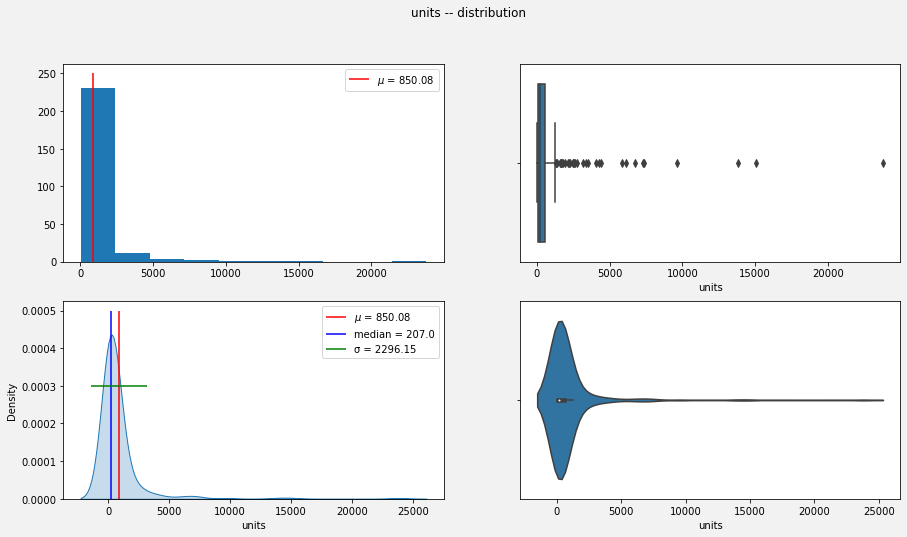

In [30]:
summary_continous(df_top, "units")

The distribution units (remember that units is the number of premises per restaurant in USA) is very similar to the sales (then we will explore this relation :p). What it changes is the range of values, it goes from thirteen (13) to twentythree thousands and eigth hundred (23800) units, but most restaurants have approximatly 90 to 400 differents premises, and there are some outliers that can have until 23000 units.

Now let's bin the units into 6 different bins

 
            the first recurrent units binned 
            is **(13.0, 400.0]** with a count of 164 times.
            In the entire dataset, it represents a percentage of 65.6 %
            
 
            the second recurrent units binned 
            is **(400.0, 800.0]** with a count of 38 times.
            In the entire dataset, it represents a percentage of 15.2 %
            
 
            the third recurrent units binned 
            is **(1200.0, 3000.0]** with a count of 20 times.
            In the entire dataset, it represents a percentage of 8.0 %
            
The first most common 3, represents a 88.8% of the whole dataset



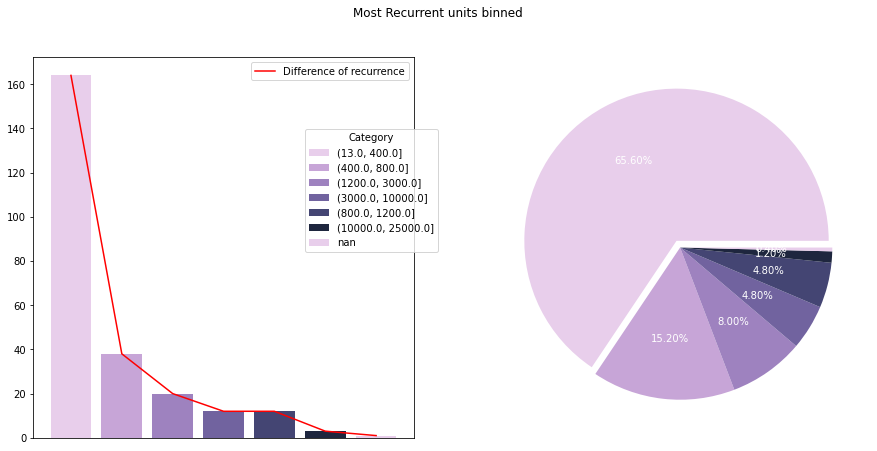

In [31]:
bins_units_top = [13, 400, 800, 1200, 3000, 10000, 25000]
df_top["units_binned"] = pd.cut(df_top["units"], bins=bins_units_top).astype(str)
summary_categorical(df_top, "units_binned", n_text=3, color=sns.color_palette("ch:s=-.25,rot=.25"))

<a id="2.2.1.4.1"></a>

##### 2.2.1.4.1 Year On Year Units (%)

The variable **YOY units %** :: 
            has a range of [-32.8, 38.5], 
            where the mean fall in 1.22 
            with a standard deviation of 7.94, 
            and the median is equal to 0.0


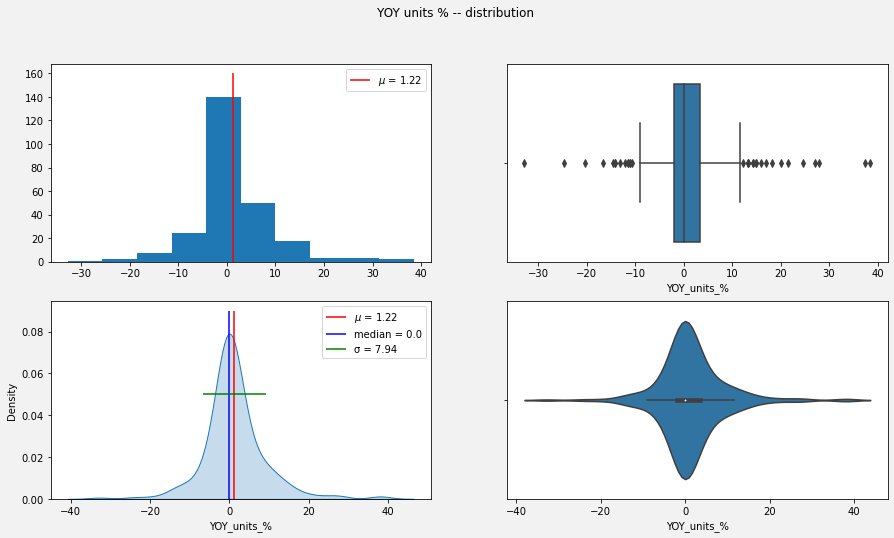

In [32]:
summary_continous(df_top, "YOY_units_%")

The distribution of the percentage growing in matter of units is a bell shape distribution, understanding it as a normal one. If we guide ourself considering the median instead of the mean (to avoid outliers), it value is exatly 0, and the standard deviation approximatly is 8. So the range where most of the values fall is [-8, 8], saying that the majority of the restaurants had increase or decrease premises in that range. Also there is a sort of left-right skew (yeah, both sides) where some restaurans had decrease or increas the number of units by ~40%.

A curious thing is that the restaurant with more growing in units is "Chicken Salad Chick", the same that we saw previously as the highest growing en sales.

In [33]:
max_growing_units = max(df_top["YOY_units_%"])
max_growing_units_rest = df_top[df_top["YOY_units_%"] == max_growing_units].reset_index(drop=True).loc[0, :]
print(
    "The restaurant {} is had the highest growing of units in 2020, with a percentage of {} and ranked in the {} position".format(max_growing_units_rest.restaurant, max_growing_units_rest.YOY_units, max_growing_units_rest["rank"]))

The restaurant Chicken Salad Chick is had the highest growing of units in 2020, with a percentage of 38.5% and ranked in the 215 position


And the same for the highest *decrease* in matter of units and sales, Houlihan's takes that position.

In [34]:
min_growing_units = min(df_top["YOY_units_%"])
min_growing_units_rest = df_top[df_top["YOY_units_%"] == min_growing_units].reset_index(drop=True).loc[0, :]
print(
    "The restaurant {} is had the highest growing of units in 2020, with a percentage of {} and ranked in the {} position".format(min_growing_units_rest.restaurant, min_growing_units_rest.YOY_units, min_growing_units_rest["rank"]))

The restaurant Houlihan's is had the highest growing of units in 2020, with a percentage of -32.8% and ranked in the 230 position


Let's see it binned:

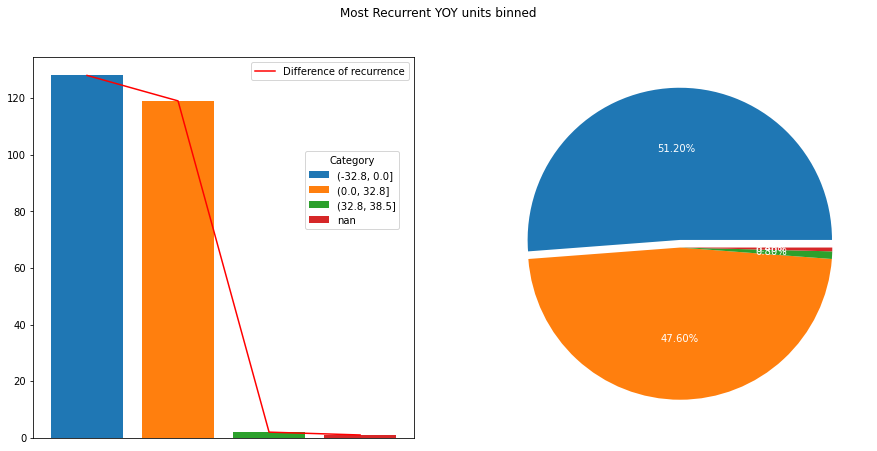

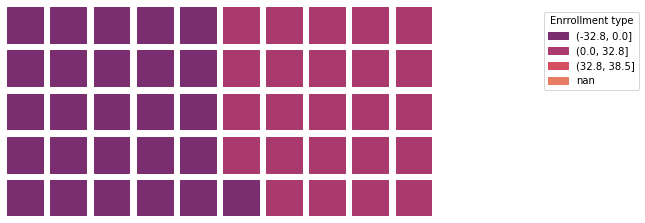

In [40]:
df_top["YOY_units_binned"] = pd.cut(df_top["YOY_units_%"], bins=[min_growing_units, 0, (min_growing_units * -1), max_growing_units]).astype(str)
summary_categorical(df_top, 
                    "YOY_units_binned", 
                    n_text=0,
                    charts=[True, True, True]
                   )